In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns



c:\Users\Hunter\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('data/project_data.csv')
df.columns = df.columns.str.strip() # many columns have preceeding and trailing whitespace in their names. This clears that whitespace.
df.replace([np.inf, -np.inf], np.nan, inplace=True) # There is an infinity value hiding somewhere
drop_columns = ['Source IP', 'Destination IP', 'Source Port', 'Destination Port', 'Flow ID', 'Timestamp', 'Protocol']
df.drop(columns=drop_columns, inplace=True)
df.head()


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,109,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,52,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,34,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # There is an infinity value hiding somewhere
print(f'Total number of cells that  are empty: {df.isnull().sum().sum()}')
df.dropna(axis=0, inplace=True)
print(f'New total number of empty cells      : {df.isnull().sum().sum()}')

Total number of cells that  are empty: 68
New total number of empty cells      : 0


In [4]:
df['Label_encoded'] = df['Label'].map({'BENIGN': 0, 'DDoS': 1})
df.drop(columns=['Label'], inplace=True)
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
0,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,109,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,52,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,34,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
original_normalized_df = pd.DataFrame(normalized_df, columns=normalized_df.columns) # this is to save the normalized_df for later. The normalized_df has columns dropped in place a lot
normalized_df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
0,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
normalized_df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
count,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,...,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000
mean,0.135368,0.002007,0.001555,0.005134,0.001153,0.046114,0.018944,0.042630,0.032116,0.234246,...,0.413122,0.001849,0.000328,0.002081,0.001776,0.086031,0.055321,0.107334,0.064638,0.567208
std,0.262718,0.007988,0.007395,0.017756,0.007583,0.159611,0.110962,0.130573,0.119156,0.317231,...,0.080120,0.007980,0.005324,0.009003,0.007843,0.182119,0.195372,0.224357,0.165270,0.495464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000594,0.000518,0.000340,0.000142,0.000000,0.000514,0.000000,0.001552,0.000000,0.000000,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012110,0.001036,0.001360,0.000164,0.000032,0.001712,0.000000,0.002241,0.000792,0.008476,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.073389,0.002071,0.001700,0.000350,0.002243,0.002911,0.004076,0.008275,0.001534,0.500000,...,0.384615,0.000019,0.000000,0.000019,0.000019,0.068678,0.000000,0.068787,0.061866,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
tree_classifier = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42)

In [9]:
from sklearn.metrics import mean_squared_error, accuracy_score
ypred = tree_classifier.predict(Xtest)
tree_acc = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc}')

Accuracy: 0.9994019006268967


In [10]:
#print(f'Feature Importances: {tree_classifier.feature_importances_}')
tree_feature_importances = pd.DataFrame(tree_classifier.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

                        importance
Fwd Packet Length Max     0.573896
Subflow Fwd Bytes         0.420578
Init_Win_bytes_forward    0.002326
Bwd Packet Length Mean    0.000855
Flow IAT Std              0.000449
...                            ...
Total Fwd Packets         0.000000
Packet Length Mean        0.000000
Packet Length Std         0.000000
Packet Length Variance    0.000000
Idle Min                  0.000000

[77 rows x 1 columns]


In [11]:
normalized_df.drop(columns=['Fwd Packet Length Max', 'Subflow Fwd Bytes'], inplace=True)
# drop the highest importances, and see if we can get a more 

y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_2 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_2.fit(Xtrain, ytrain)

ypred = tree_classifier_2.predict(Xtest)
tree_acc_2 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_2}')


Accuracy: 0.999313293312363


In [12]:
tree_feature_importances = pd.DataFrame(tree_classifier_2.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

                             importance
Fwd Packet Length Mean         0.572717
Total Length of Fwd Packets    0.420368
Bwd Header Length              0.002834
Init_Win_bytes_forward         0.001187
Avg Bwd Segment Size           0.000855
...                                 ...
Total Fwd Packets              0.000000
Packet Length Mean             0.000000
Packet Length Std              0.000000
Packet Length Variance         0.000000
Idle Min                       0.000000

[75 rows x 1 columns]


In [13]:
normalized_df.drop(columns=['Fwd Packet Length Mean', 'Total Length of Fwd Packets'], inplace=True)

y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_3 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_3.fit(Xtrain, ytrain)

ypred = tree_classifier_3.predict(Xtest)
tree_acc_3 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_3}')



Accuracy: 0.9993797487982633


In [14]:
tree_feature_importances = pd.DataFrame(tree_classifier_3.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

                         importance
Avg Fwd Segment Size       0.573096
act_data_pkt_fwd           0.381692
Avg Bwd Segment Size       0.023123
Init_Win_bytes_backward    0.015988
Fwd Header Length          0.002702
...                             ...
Bwd Packets/s              0.000000
Min Packet Length          0.000000
Max Packet Length          0.000000
Total Fwd Packets          0.000000
Idle Min                   0.000000

[73 rows x 1 columns]


In [15]:
normalized_df.drop(columns=['Avg Fwd Segment Size', 'act_data_pkt_fwd'], inplace=True)

y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_4 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_4.fit(Xtrain, ytrain)

ypred = tree_classifier_4.predict(Xtest)
tree_acc_4 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_4}')

tree_feature_importances = pd.DataFrame(tree_classifier_4.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.9995569634273309
                         importance
Init_Win_bytes_forward     0.543507
Fwd Packet Length Std      0.292457
Flow IAT Std               0.123143
Packet Length Mean         0.034127
Init_Win_bytes_backward    0.001841
...                             ...
Min Packet Length          0.000000
Total Fwd Packets          0.000000
Packet Length Std          0.000000
Packet Length Variance     0.000000
Idle Min                   0.000000

[71 rows x 1 columns]


In [16]:
normalized_df.drop(columns=['Init_Win_bytes_forward', 'Fwd Packet Length Std'], inplace=True)

y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_5 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_5.fit(Xtrain, ytrain)

ypred = tree_classifier_5.predict(Xtest)
tree_acc_5 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_5}')

tree_feature_importances = pd.DataFrame(tree_classifier_5.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.9986930421106263
                         importance
Subflow Fwd Packets        0.455423
Init_Win_bytes_backward    0.309963
Fwd Header Length          0.083817
Bwd Packet Length Min      0.070161
Avg Bwd Segment Size       0.023705
...                             ...
Min Packet Length          0.000000
Total Fwd Packets          0.000000
Packet Length Std          0.000000
Packet Length Variance     0.000000
Idle Min                   0.000000

[69 rows x 1 columns]


In [17]:
normalized_df.drop(columns=['Subflow Fwd Packets', 'Init_Win_bytes_backward'], inplace=True)
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_6 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_6.fit(Xtrain, ytrain)

ypred = tree_classifier_6.predict(Xtest)
tree_acc_6 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_6}')

tree_feature_importances = pd.DataFrame(tree_classifier_6.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.9975632988503201
                       importance
Total Fwd Packets        0.457645
Bwd Header Length        0.229473
Bwd Packet Length Min    0.152375
min_seg_size_forward     0.044431
PSH Flag Count           0.032642
...                           ...
Bwd Packets/s            0.000000
Max Packet Length        0.000000
Packet Length Mean       0.000000
Packet Length Std        0.000000
Idle Min                 0.000000

[67 rows x 1 columns]


In [18]:
normalized_df.drop(columns=['Total Fwd Packets', 'Bwd Header Length'], inplace=True)
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_7 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_7.fit(Xtrain, ytrain)

ypred = tree_classifier_7.predict(Xtest)
tree_acc_7 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_7}')

tree_feature_importances = pd.DataFrame(tree_classifier_7.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.9975854506789535
                        importance
Bwd Packet Length Min     0.455087
Bwd IAT Total             0.231481
Flow IAT Std              0.160155
min_seg_size_forward      0.052910
PSH Flag Count            0.033321
...                            ...
Min Packet Length         0.000000
Packet Length Std         0.000000
Packet Length Variance    0.000000
FIN Flag Count            0.000000
Idle Min                  0.000000

[65 rows x 1 columns]


In [19]:
normalized_df.columns

Index(['Flow Duration', 'Total Backward Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Bwd Segment Size'

In [20]:
drop_columns = ['Total Backward Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std']

normalized_df.drop(columns=drop_columns, inplace=True)

y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_8 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_8.fit(Xtrain, ytrain)

ypred = tree_classifier_8.predict(Xtest)
tree_acc_8 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_8}')

tree_feature_importances = pd.DataFrame(tree_classifier_8.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.997363932392619
                        importance
Fwd Header Length         0.451560
Subflow Bwd Packets       0.219424
PSH Flag Count            0.103254
min_seg_size_forward      0.088668
Min Packet Length         0.044515
Fwd Header Length.1       0.024922
Avg Bwd Segment Size      0.023813
Fwd IAT Min               0.019411
SYN Flag Count            0.012072
Fwd PSH Flags             0.004526
Subflow Bwd Bytes         0.003273
URG Flag Count            0.001133
Fwd Packets/s             0.001091
Bwd IAT Min               0.000820
Bwd IAT Total             0.000790
Active Mean               0.000306
Flow IAT Min              0.000234
Fwd IAT Std               0.000187
Fwd Avg Bytes/Bulk        0.000000
ECE Flag Count            0.000000
Idle Max                  0.000000
Down/Up Ratio             0.000000
Idle Std                  0.000000
Average Packet Size       0.000000
Idle Mean                 0.000000
Active Min                0.000000
Fwd Avg Bulk Rate         0

In [21]:
normalized_df.drop(columns=['Fwd Header Length', 'Fwd Header Length.1', 'Subflow Bwd Packets', 'Avg Bwd Segment Size', 'Subflow Bwd Bytes'], inplace=True)

y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_9 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_9.fit(Xtrain, ytrain)

ypred = tree_classifier_9.predict(Xtest)
tree_acc_9 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_9}')

tree_feature_importances = pd.DataFrame(tree_classifier_9.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.9968987439913165
                        importance
Average Packet Size       0.312822
Fwd IAT Std               0.302856
Packet Length Std         0.215708
Bwd IAT Mean              0.080782
Bwd IAT Total             0.056741
Down/Up Ratio             0.022584
Packet Length Variance    0.005285
Idle Mean                 0.002208
URG Flag Count            0.000476
Bwd Packets/s             0.000315
Fwd IAT Total             0.000223
Fwd Avg Bytes/Bulk        0.000000
ECE Flag Count            0.000000
Fwd Avg Bulk Rate         0.000000
CWE Flag Count            0.000000
ACK Flag Count            0.000000
Fwd Avg Packets/Bulk      0.000000
Bwd Avg Bulk Rate         0.000000
Bwd Avg Bytes/Bulk        0.000000
Bwd Avg Packets/Bulk      0.000000
RST Flag Count            0.000000
min_seg_size_forward      0.000000
Active Mean               0.000000
Active Std                0.000000
Active Max                0.000000
Active Min                0.000000
Idle Std                  

In [22]:
normalized_df.columns

Index(['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'min_seg_size_forward', 'Active Mean',
       'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle

In [23]:
#Average Packet Size       0.312822
#Fwd IAT Std               0.302856
#Packet Length Std         0.215708
normalized_df.drop(columns=['Average Packet Size', 'Fwd IAT Std', 'Packet Length Std', 'Packet Length Mean', 'Down/Up Ratio', 'Bwd IAT Total', "Flow IAT Std", 'Fwd IAT Total'], inplace=True)

y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_10 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_10.fit(Xtrain, ytrain)

ypred = tree_classifier_10.predict(Xtest)
tree_acc_10 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_10}')

tree_feature_importances = pd.DataFrame(tree_classifier_10.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.9970759586203841
                        importance
Packet Length Variance    0.435727
Fwd IAT Max               0.307461
Bwd IAT Max               0.208419
Fwd IAT Min               0.033156
Fwd IAT Mean              0.008085
Flow Packets/s            0.001877
ACK Flag Count            0.001546
Bwd Packets/s             0.001192
Min Packet Length         0.001010
Bwd IAT Std               0.000732
PSH Flag Count            0.000563
FIN Flag Count            0.000232
Bwd Avg Packets/Bulk      0.000000
Fwd Avg Packets/Bulk      0.000000
Fwd Avg Bytes/Bulk        0.000000
Fwd Avg Bulk Rate         0.000000
Bwd Avg Bytes/Bulk        0.000000
Active Mean               0.000000
Bwd Avg Bulk Rate         0.000000
min_seg_size_forward      0.000000
CWE Flag Count            0.000000
Active Std                0.000000
Active Max                0.000000
Active Min                0.000000
Idle Mean                 0.000000
Idle Std                  0.000000
Idle Max                  

In [24]:
# Packet Length Variance    0.435727
# Fwd IAT Max               0.307461
# Bwd IAT Max               0.208419
# Fwd IAT Min               0.033156
# Fwd IAT Mean              0.008085

drop_columns = ['Packet Length Variance', 'Fwd IAT Max', 'Bwd IAT Max', 'Fwd IAT Min', 'Fwd IAT Mean', 'Max Packet Length', 'Bwd IAT Std', 'URG Flag Count', 'Bwd IAT Mean', 
                'Min Packet Length']
normalized_df.drop(columns=drop_columns, inplace=True)
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_11 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_11.fit(Xtrain, ytrain)

ypred = tree_classifier_11.predict(Xtest)
tree_acc_11 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_11}')

tree_feature_importances = pd.DataFrame(tree_classifier_11.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.951952683694039
                      importance
Fwd Packets/s           0.222623
Active Max              0.154373
min_seg_size_forward    0.140633
Bwd Packets/s           0.124249
Flow IAT Min            0.081411
Idle Mean               0.072782
Flow IAT Mean           0.057089
PSH Flag Count          0.044957
ACK Flag Count          0.035329
Fwd PSH Flags           0.033959
Flow Duration           0.030756
Active Min              0.001839
Bwd URG Flags           0.000000
Fwd URG Flags           0.000000
Idle Max                0.000000
Idle Std                0.000000
Flow Packets/s          0.000000
Flow IAT Max            0.000000
Active Std              0.000000
Active Mean             0.000000
Bwd IAT Min             0.000000
Bwd Avg Bulk Rate       0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bytes/Bulk      0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
ECE Flag Count          0.000000
CWE Flag Count 

In [25]:
# Fwd Packets/s           0.222623
# Active Max              0.154373
# min_seg_size_forward    0.140633
# Bwd Packets/s           0.124249
# Flow IAT Min            0.081411
# Idle Mean               0.072782
# Flow IAT Mean           0.057089
# PSH Flag Count          0.044957
# ACK Flag Count          0.035329
# Fwd PSH Flags           0.033959
# Flow Duration           0.030756
# Active Min              0.001839
drop_columns = ['Fwd Packets/s', 'Active Max', 'min_seg_size_forward', 'Bwd Packets/s', 'Flow IAT Min', 'Idle Mean', 'Flow IAT Mean',
                'PSH Flag Count', 'ACK Flag Count', 'Fwd PSH Flags', 'Flow Duration', 'Active Min', 'Flow IAT Max', 'Flow Bytes/s',
                'Active Mean', 'Flow Packets/s']

normalized_df.drop(columns=drop_columns, inplace=True)
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_12 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_12.fit(Xtrain, ytrain)

ypred = tree_classifier_12.predict(Xtest)
tree_acc_12 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_12}')

tree_feature_importances = pd.DataFrame(tree_classifier_12.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.6414948053961854
                      importance
SYN Flag Count          0.332176
Idle Max                0.254301
Active Std              0.252492
Bwd IAT Min             0.124185
FIN Flag Count          0.019095
Idle Min                0.017751
RST Flag Count          0.000000
CWE Flag Count          0.000000
ECE Flag Count          0.000000
Bwd PSH Flags           0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bulk Rate       0.000000
Bwd Avg Bytes/Bulk      0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bulk Rate       0.000000
Bwd URG Flags           0.000000
Idle Std                0.000000
Fwd URG Flags           0.000000
Fwd Avg Bytes/Bulk      0.000000


## Features Dropped and Accuracy
At this point, with the features above being dropped, my accuracy dropped from over 90% to 64%.
Likely, we are now unable to accurately predict models, as too many important features have been dropped.

In [26]:
len(normalized_df.columns)

20

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest.fit(Xtrain, ytrain)
ypred = forest.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.65582703852203


In [28]:
forest_importances = pd.DataFrame(forest.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_importances)

                      importance
SYN Flag Count          0.248951
Bwd IAT Min             0.178314
Idle Min                0.177955
Idle Max                0.162024
Active Std              0.155614
Idle Std                0.061730
FIN Flag Count          0.014631
ECE Flag Count          0.000411
RST Flag Count          0.000371
Bwd URG Flags           0.000000
Fwd URG Flags           0.000000
CWE Flag Count          0.000000
Bwd PSH Flags           0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bulk Rate       0.000000
Bwd Avg Bytes/Bulk      0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bulk Rate       0.000000
Fwd Avg Bytes/Bulk      0.000000


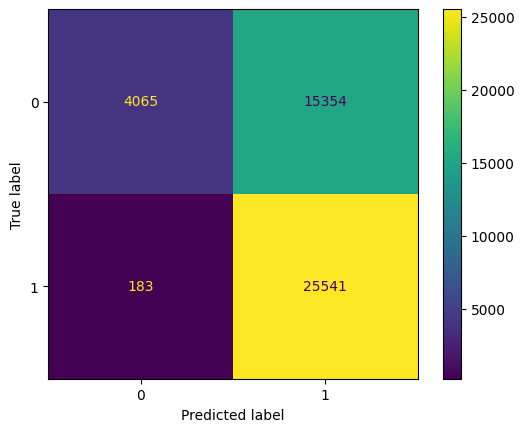

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix)
cm.plot()

In [30]:
forest_2 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_2.fit(Xtrain, ytrain)
#ypred = forest.predict(Xtest)
#print(accuracy_score(ytest, ypred))

RandomForestClassifier(class_weight='balanced', n_estimators=500)

In [31]:
ypred = forest_2.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.5972132999579115


## Accuracy did not improve
By trying to tighten the model, things seem to have gotten worse. We'll need to reintroduce some features.

```Reintroduce any column labeled IAT```

In [32]:
print(normalized_df.columns)
normalized_df.shape

Index(['Bwd IAT Min', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count',
       'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Active Std', 'Idle Std', 'Idle Max', 'Idle Min',
       'Label_encoded'],
      dtype='object')


(225711, 20)

In [33]:
print(original_normalized_df.columns)
original_normalized_df.shape

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

(225711, 78)

In [34]:
# 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
#       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
#       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
#       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',

normalized_df['Flow IAT Mean'] = original_normalized_df['Flow IAT Mean'] # Add one column and see what happens


In [35]:
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_13 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_13.fit(Xtrain, ytrain)

ypred = tree_classifier_13.predict(Xtest)
tree_acc_13 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_13}')

tree_feature_importances = pd.DataFrame(tree_classifier_13.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.804598719624305
                      importance
Flow IAT Mean           0.638880
SYN Flag Count          0.101293
Active Std              0.095067
Idle Min                0.082605
Idle Max                0.043308
Bwd IAT Min             0.038847
RST Flag Count          0.000000
CWE Flag Count          0.000000
ECE Flag Count          0.000000
Fwd Avg Bytes/Bulk      0.000000
Bwd PSH Flags           0.000000
Fwd Avg Bulk Rate       0.000000
Bwd Avg Bytes/Bulk      0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bulk Rate       0.000000
FIN Flag Count          0.000000
Idle Std                0.000000
Bwd URG Flags           0.000000
Fwd URG Flags           0.000000
Fwd Avg Packets/Bulk    0.000000


In [36]:
# 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
#       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
#       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
#       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',

normalized_df['Flow IAT Std'] = original_normalized_df['Flow IAT Std'] # Add one column and see what happens
normalized_df['Flow IAT Max'] = original_normalized_df['Flow IAT Max'] # Add one column and see what happens
normalized_df['Flow IAT Min'] = original_normalized_df['Flow IAT Min'] # Add one column and see what happens
#normalized_df['Flow IAT Total'] = original_normalized_df['Flow IAT Total'] # Add one column and see what happens


In [37]:
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_14 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_14.fit(Xtrain, ytrain)

ypred = tree_classifier_14.predict(Xtest)
tree_acc_14 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_14}')

tree_feature_importances = pd.DataFrame(tree_classifier_14.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.8830161929867311
                      importance
Flow IAT Std            0.437768
Flow IAT Mean           0.215560
Flow IAT Max            0.141087
SYN Flag Count          0.085030
Active Std              0.080515
Bwd IAT Min             0.023307
Idle Min                0.010250
Idle Max                0.006482
Bwd Avg Bytes/Bulk      0.000000
Idle Std                0.000000
Bwd Avg Bulk Rate       0.000000
Bwd Avg Packets/Bulk    0.000000
Fwd Avg Bulk Rate       0.000000
Bwd PSH Flags           0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
ECE Flag Count          0.000000
CWE Flag Count          0.000000
RST Flag Count          0.000000
FIN Flag Count          0.000000
Bwd URG Flags           0.000000
Fwd URG Flags           0.000000
Flow IAT Min            0.000000


In [38]:
normalized_df.drop(columns='Bwd IAT Min', inplace=True) # Bwd and Fwd can be caught inside the total flow statistics.
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_15 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_15.fit(Xtrain, ytrain)

ypred = tree_classifier_15.predict(Xtest)
tree_acc_15 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_15}')

tree_feature_importances = pd.DataFrame(tree_classifier_15.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.8748200163923532
                      importance
Flow IAT Std            0.442618
Flow IAT Mean           0.181939
Flow IAT Max            0.174551
SYN Flag Count          0.087892
Active Std              0.083224
Flow IAT Min            0.018948
Idle Min                0.010828
Bwd Avg Packets/Bulk    0.000000
Idle Max                0.000000
Idle Std                0.000000
Bwd Avg Bulk Rate       0.000000
Bwd PSH Flags           0.000000
Fwd URG Flags           0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
ECE Flag Count          0.000000
CWE Flag Count          0.000000
RST Flag Count          0.000000
FIN Flag Count          0.000000
Bwd URG Flags           0.000000
Bwd Avg Bytes/Bulk      0.000000


In [39]:
forest_3 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_3.fit(Xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', n_estimators=500)

In [40]:
ypred = forest_3.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9492058569434907


In [41]:
forest_3_importances = pd.DataFrame(forest_3.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_3_importances)

                      importance
Flow IAT Mean           0.284107
Flow IAT Std            0.266455
Flow IAT Max            0.215656
Flow IAT Min            0.063739
SYN Flag Count          0.047710
Idle Max                0.037316
Idle Min                0.034519
Active Std              0.033028
Idle Std                0.016458
FIN Flag Count          0.000794
RST Flag Count          0.000109
ECE Flag Count          0.000109
Bwd Avg Bulk Rate       0.000000
Bwd PSH Flags           0.000000
Bwd Avg Packets/Bulk    0.000000
Fwd URG Flags           0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
CWE Flag Count          0.000000
Bwd URG Flags           0.000000
Bwd Avg Bytes/Bulk      0.000000


# Reintroduction of Features
After dropping many features, the accuracy dropped from about 95% to 65%.\
To reintroduce features, we discussed reintroducing a single "grouping" of features, and we chose Inter Arrival Times of packets.

## Groupings of IAT
* Flow IAT
* Fwd IAT
* Bwd IAT

We chose to stick with Flow IAT, as it contains info about Fwd and Bwd IAT. (Fwd specifies incoming to the target resource, and Bwd specifies outgoing from the target resource. Flow aggregates Fwd and Bwd data).\
After reintroducing Flow IAT measurements, Flow IAT Mean, Flow IAT Std, Flow IAT Max, and Flow IAT Min, the score of a Decision Tree reached 88% from 65%.\ At this point, we dropped any remaining Fwd and Bwd IAT information that was still in the dataset, and we switched back to a Random Forest Classifer. We were able to more evenly balance the feature importances.


Text(0.5, 1.0, 'Random Forest Classifier')

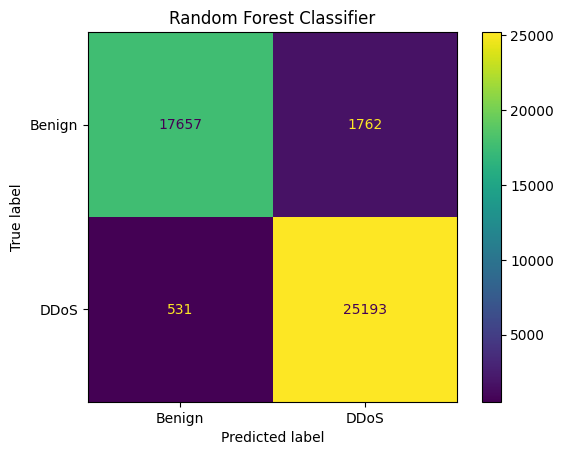

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Benign', 'DDoS'])
cm.plot()
plt.title(label='Random Forest Classifier')


# Analyzing the Confusion Matrix
### Classes
* TP = 25184 correctly labelled as DDoS
* FN = 540 DDoS classes incorrectly labelled as Benign
* TN = 17658 correctly labelled as Benign
* FP = 1761 benign classes incorrectly labelled as DDoS

### False Negatives --- Dangerous!
False Negatives are the most dangerous value in our dataset. In a real environment, these represent DDoS attack flows that are being permitted through defense mechanisms without detection.\
This value should be reduced as low as possible to ensure defense of a network. Thankfully, our model already appears to have a low number of false negatives, but we would like to test if they could be reduced further.

### False Positives --- Annoying
False Positives are the Benign classes being labelled as DDoS. Although this does not represent a true threat to a target resource, the model will be "paranoid" that actual attacks are occuring.\
In a real environment, this could cause defense mechanisms to be overreactive and make personnel spend resources on something that is not a problem.



In [43]:
#print(matrix)
#print(matrix.ravel())
tn, fp, fn, tp = matrix.ravel()

recall = tp/(tp + fn) * 100
precision = tp/(tp+fp) * 100
f1_score = 2 * ((precision * recall) / (precision + recall))
accuracy = accuracy_score(ytest, ypred)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1_score}')
print(f'Accuracy: {accuracy}')

Recall: 97.93577981651376
Precision: 93.46317937302912
F1 Score: 95.64722185311034
Accuracy: 0.9492058569434907


In [44]:
#forest_4 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced', max_features=None)
#y = normalized_df['Label_encoded']
#X = normalized_df.drop(columns=['Label_encoded'])
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

#forest_4.fit(Xtrain, ytrain)
#ypred = forest_4.predict(Xtest)
#print(accuracy_score(ytest, ypred))


### Max Features
Changing this in the above cells seemed to really increase the complexity of the model, with no reward.

In [45]:
forest_5 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_5.fit(Xtrain, ytrain)
ypred = forest_5.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.949515982544359


### Class Weight
Changing to balanced_subsample does not appear to change the accuracy in a meaningful way in our model.

In [46]:
forest_5_importances = pd.DataFrame(forest_5.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_5_importances)

                      importance
Flow IAT Mean           0.285882
Flow IAT Std            0.273602
Flow IAT Max            0.213685
Flow IAT Min            0.059928
SYN Flag Count          0.047642
Idle Max                0.039279
Idle Min                0.032839
Active Std              0.030575
Idle Std                0.015664
FIN Flag Count          0.000699
RST Flag Count          0.000106
ECE Flag Count          0.000098
Bwd Avg Bulk Rate       0.000000
Bwd PSH Flags           0.000000
Bwd Avg Packets/Bulk    0.000000
Fwd URG Flags           0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
CWE Flag Count          0.000000
Bwd URG Flags           0.000000
Bwd Avg Bytes/Bulk      0.000000


In [47]:
# Use this to view the original columns
original_normalized_df.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1) #log_loss is the default loss function
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)


gb_clf.fit(Xtrain, ytrain)
ypred = gb_clf.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.8806459473229515


In [49]:
#gb_clf2 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1) #log_loss is the default loss function
#y = normalized_df['Label_encoded']
#X = normalized_df.drop(columns=['Label_encoded'])
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
#
#
#gb_clf2.fit(Xtrain, ytrain)
#ypred = gb_clf2.predict(Xtest)
#print(accuracy_score(ytest, ypred))

In [50]:
#gb_clf2_importances = pd.DataFrame(gb_clf2.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
#print(gb_clf2_importances)

In [51]:
#from sklearn.utils.class_weight import compute_sample_weight
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
#sample_weights = compute_sample_weight(class_weight='balanced', y=ytrain)
#
#gb_clf3 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1) #log_loss is the default loss function
#gb_clf3.fit(Xtrain, ytrain, sample_weight=sample_weights)
#ypred = gb_clf3.predict(Xtest)
#print(accuracy_score(ytest, ypred))

In [52]:
#gb_clf3_importances = pd.DataFrame(gb_clf3.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
#print(gb_clf3_importances)

In [53]:
#gb_clf4 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample=0.5) #log_loss is the default loss function
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
#
#gb_clf4.fit(Xtrain, ytrain)
#ypred = gb_clf4.predict(Xtest)
#print(accuracy_score(ytest, ypred))

In [54]:
#gb_clf4_importances = pd.DataFrame(gb_clf4.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
#print(gb_clf4_importances)

In [55]:
#gb_clf5 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample=0.1) #log_loss is the default loss function
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
#
#gb_clf5.fit(Xtrain, ytrain)
#ypred = gb_clf5.predict(Xtest)
#print(accuracy_score(ytest, ypred))

In [56]:
#gb_clf6 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, subsample=0.5) #log_loss is the default loss function
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

#gb_clf6.fit(Xtrain, ytrain)
#ypred = gb_clf6.predict(Xtest)
#print(accuracy_score(ytest, ypred))

In [57]:
#gb_clf7 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, subsample=0.5) #log_loss is the default loss function
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

#gb_clf7.fit(Xtrain, ytrain)
#ypred = gb_clf7.predict(Xtest)
#print(accuracy_score(ytest, ypred))

In [58]:
#gb_clf8 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.7, subsample=0.5) #log_loss is the default loss function
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

#gb_clf8.fit(Xtrain, ytrain)
#ypred = gb_clf8.predict(Xtest)
#print(accuracy_score(ytest, ypred))

## Random Forest vs Gradient Boosting
The Random Forest currently performs just better than the Gradient Boost Machine.
It might be worth it to put each of them through a Grid Search.


In [59]:
#forest_5 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced_subsample')
#y = normalized_df['Label_encoded']
#X = normalized_df.drop(columns=['Label_encoded'])
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
#
#forest_5.fit(Xtrain, ytrain)
#ypred = forest_5.predict(Xtest)
#print(accuracy_score(ytest, ypred))

#y = normalized_df['Label_encoded']
#X = normalized_df.drop(columns=['Label_encoded'])
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)



In [60]:
#from sklearn.model_selection import GridSearchCV

#forest_params = {
#    'n_estimators':[125, 250, 500],
#    'max_depth': [5, 10, 15, None],
#    'criterion': ['gini', 'entropy'],
#    'class_weight':['balanced_subsample']
#}

#rf = RandomForestClassifier()
#grid_search = GridSearchCV(estimator=rf, param_grid=forest_params, cv=5, verbose=2, n_jobs=-1) # use all processors
#grid_search.fit(Xtrain, ytrain)

In [61]:
#print("Best Params: ", grid_search.best_params_)
#print("Best CV Score: ", grid_search.best_score_)

In [62]:
#gb_clf8 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.7, subsample=0.5) #log_loss is the default loss function
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

#gb_clf8.fit(Xtrain, ytrain)
#ypred = gb_clf8.predict(Xtest)
#print(accuracy_score(ytest, ypred))

#gb_params = {
#    'n_estimators': [250, 500],
#    'learning_rate':[0.05, 0.1, 0.5, 0.7, 1],
#    'subsample': [0.1, 0.5, 1]
#}

#gb = GradientBoostingClassifier()
#grid_search2 = GridSearchCV(estimator=gb, param_grid=gb_params, cv=5, verbose=2, n_jobs=-1)
#grid_search2.fit(Xtrain, ytrain)

In [63]:
#print("Best Params: ", grid_search2.best_params_)
#print("Best CV Score: ", grid_search2.best_score_)

## Random Forest and Gradient Boost Classifier Results
After running each classifier through a GridSearch, neither model had any noticeable improvement.
Both models are still about 94% and 93% respectively. It might be worth it to look into readding features.

In [64]:
normalized_df.columns

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count', 'ECE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Active Std', 'Idle Std', 'Idle Max', 'Idle Min', 'Label_encoded',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min'],
      dtype='object')

In [65]:
original_normalized_df.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [66]:
#                      importance
#Flow IAT Mean           0.289722
#Flow IAT Std            0.264096
#Flow IAT Max            0.215410
#Flow IAT Min            0.061349
#SYN Flag Count          0.048358
#Idle Max                0.036991
#Idle Min                0.034345
#Active Std              0.032393
#Idle Std                0.016399
#FIN Flag Count          0.000723
#ECE Flag Count          0.000110
#RST Flag Count          0.000103
#Bwd Avg Bulk Rate       0.000000
#Bwd PSH Flags           0.000000
#Bwd Avg Packets/Bulk    0.000000
#Fwd URG Flags           0.000000
#Fwd Avg Bulk Rate       0.000000
#Fwd Avg Packets/Bulk    0.000000
#Fwd Avg Bytes/Bulk      0.000000
#CWE Flag Count          0.000000
#Bwd URG Flags           0.000000
#Bwd Avg Bytes/Bulk      0.000000

In [67]:
# 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       #'Idle Std', 'Idle Max', 'Idle Min'

#Idle Max                0.036991
#Idle Min                0.034345
#Idle Std                0.016399

#Active Std              0.032393

normalized_df["Active Mean"] = original_normalized_df["Active Mean"]
normalized_df["Active Max"] = original_normalized_df["Active Max"]
normalized_df["Active Min"] = original_normalized_df["Active Min"]

normalized_df["Idle Mean"] = original_normalized_df["Idle Mean"]


In [68]:
normalized_df.columns
normalized_df.shape

(225711, 27)

In [69]:
forest_6 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_6.fit(Xtrain, ytrain)
ypred = forest_6.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9565824158784307


In [70]:
forest_7 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_7.fit(Xtrain, ytrain)
ypred = forest_7.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9569368451365661


In [71]:
forest_7_importances = pd.DataFrame(forest_7.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_7_importances)

                      importance
Flow IAT Std            0.221225
Flow IAT Mean           0.198639
Flow IAT Max            0.197018
Active Max              0.062536
Active Mean             0.059704
Active Min              0.055881
Flow IAT Min            0.054134
Idle Mean               0.038931
Idle Min                0.038563
Idle Max                0.029510
SYN Flag Count          0.029253
Active Std              0.007364
Idle Std                0.006272
FIN Flag Count          0.000794
RST Flag Count          0.000092
ECE Flag Count          0.000084
Bwd PSH Flags           0.000000
Fwd URG Flags           0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bytes/Bulk      0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
CWE Flag Count          0.000000
Bwd URG Flags           0.000000
Bwd Avg Bulk Rate       0.000000


In [72]:
#'Subflow Fwd Packets', 'Subflow Fwd Bytes',
#       'Subflow Bwd Packets', 'Subflow Bwd Bytes
normalized_df['Subflow Fwd Packets'] = original_normalized_df['Subflow Fwd Packets']
normalized_df['Subflow Fwd Bytes'] = original_normalized_df['Subflow Fwd Bytes']
normalized_df['Subflow Bwd Packets'] = original_normalized_df['Subflow Bwd Packets']
normalized_df['Subflow Bwd Bytes'] = original_normalized_df['Subflow Bwd Bytes']

In [73]:
forest_8 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_8.fit(Xtrain, ytrain)
ypred = forest_8.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9994240524555302


In [74]:
forest_8_importances = pd.DataFrame(forest_8.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_8_importances)

                      importance
Subflow Fwd Bytes       0.270357
Subflow Bwd Bytes       0.190934
Subflow Fwd Packets     0.189278
Subflow Bwd Packets     0.095815
Flow IAT Std            0.069861
Flow IAT Mean           0.043884
Flow IAT Max            0.040964
Active Max              0.017298
Active Mean             0.017105
Active Min              0.014604
Flow IAT Min            0.013643
Idle Max                0.009189
Idle Min                0.008309
Idle Mean               0.007588
SYN Flag Count          0.004364
Active Std              0.004247
Idle Std                0.002043
FIN Flag Count          0.000510
ECE Flag Count          0.000005
RST Flag Count          0.000005
Fwd URG Flags           0.000000
Bwd Avg Bulk Rate       0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bytes/Bulk      0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
CWE Flag Count          0.000000
Bwd URG Flags           0.000000
Bwd PSH Fl

In [75]:
drop = ['Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes']
normalized_df.drop(columns=drop, inplace=True)
normalized_df.columns

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count', 'ECE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Active Std', 'Idle Std', 'Idle Max', 'Idle Min', 'Label_encoded',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Active Mean', 'Active Max', 'Active Min', 'Idle Mean'],
      dtype='object')

In [76]:
normalized_df['Flow Packets/s'] = original_normalized_df['Flow Packets/s']
normalized_df.columns

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count', 'ECE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Active Std', 'Idle Std', 'Idle Max', 'Idle Min', 'Label_encoded',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Active Mean', 'Active Max', 'Active Min', 'Idle Mean',
       'Flow Packets/s'],
      dtype='object')

In [77]:
forest_9 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_9.fit(Xtrain, ytrain)
ypred = forest_9.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9524621757526084


In [78]:
forest_9_importances = pd.DataFrame(forest_9.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_9_importances)

                      importance
Flow IAT Std            0.207672
Flow IAT Mean           0.162851
Flow IAT Max            0.162083
Active Max              0.070191
Active Min              0.064756
Active Mean             0.063629
Flow Packets/s          0.062020
Flow IAT Min            0.051696
Idle Min                0.041429
Idle Mean               0.038660
Idle Max                0.031119
SYN Flag Count          0.029922
Active Std              0.007382
Idle Std                0.005685
FIN Flag Count          0.000725
ECE Flag Count          0.000093
RST Flag Count          0.000090
Bwd PSH Flags           0.000000
Fwd URG Flags           0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bytes/Bulk      0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
CWE Flag Count          0.000000
Bwd URG Flags           0.000000
Bwd Avg Bulk Rate       0.000000


In [79]:
#'Total Fwd Packets', 'Total Backward Packets'
normalized_df['Total Fwd Packets'] = original_normalized_df['Total Fwd Packets']
normalized_df['Total Backward Packets'] = original_normalized_df['Total Backward Packets']

normalized_df.columns

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count', 'ECE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Active Std', 'Idle Std', 'Idle Max', 'Idle Min', 'Label_encoded',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Active Mean', 'Active Max', 'Active Min', 'Idle Mean',
       'Flow Packets/s', 'Total Fwd Packets', 'Total Backward Packets'],
      dtype='object')

In [80]:
forest_10 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_10.fit(Xtrain, ytrain)
ypred = forest_10.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9972974769067187


In [81]:
forest_10_importances = pd.DataFrame(forest_10.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_10_importances)

                        importance
Total Fwd Packets         0.320958
Total Backward Packets    0.200962
Flow IAT Std              0.102547
Flow IAT Max              0.078429
Flow IAT Mean             0.067590
Flow Packets/s            0.036159
Active Mean               0.031213
Active Max                0.030788
Active Min                0.027715
Idle Mean                 0.021970
Flow IAT Min              0.021212
Idle Min                  0.019416
Idle Max                  0.016401
SYN Flag Count            0.012543
Idle Std                  0.005904
Active Std                0.005651
FIN Flag Count            0.000449
RST Flag Count            0.000048
ECE Flag Count            0.000044
Fwd URG Flags             0.000000
Bwd Avg Bulk Rate         0.000000
Bwd Avg Packets/Bulk      0.000000
Bwd Avg Bytes/Bulk        0.000000
Fwd Avg Bulk Rate         0.000000
Fwd Avg Packets/Bulk      0.000000
Fwd Avg Bytes/Bulk        0.000000
CWE Flag Count            0.000000
Bwd URG Flags       

In [82]:
drop = ['Total Fwd Packets', 'Total Backward Packets']
normalized_df.drop(columns=drop, inplace=True)

In [83]:
original_normalized_df.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [84]:
normalized_df.drop(columns=['SYN Flag Count'], inplace=True) # dropped because SYN is TCP related

In [85]:
#Flow IAT Std              0.096369
#Flow IAT Max              0.076349
#Flow IAT Mean             0.069042
#Flow Packets/s            0.041150
#Active Max                0.030812
#Active Mean               0.029518
#Active Min                0.026151
#Flow IAT Min              0.020573
normalized_df['Fwd Avg Bulk Rate'] = original_normalized_df['Fwd Avg Bulk Rate']
normalized_df['Bwd Avg Bulk Rate'] = original_normalized_df['Bwd Avg Bulk Rate']

In [86]:
normalized_df.columns

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'RST Flag Count', 'CWE Flag Count', 'ECE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Active Std', 'Idle Std', 'Idle Max', 'Idle Min', 'Label_encoded',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Active Mean', 'Active Max', 'Active Min', 'Idle Mean',
       'Flow Packets/s'],
      dtype='object')

In [87]:
forest_11 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_11.fit(Xtrain, ytrain)
ypred = forest_11.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9503356002037968


In [88]:
forest_11_importances = pd.DataFrame(forest_11.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_11_importances)

                      importance
Flow IAT Std            0.210853
Flow IAT Mean           0.173104
Flow IAT Max            0.166680
Active Min              0.067287
Active Max              0.067124
Active Mean             0.066349
Flow Packets/s          0.066284
Flow IAT Min            0.053605
Idle Mean               0.043212
Idle Min                0.038867
Idle Max                0.029709
Active Std              0.009958
Idle Std                0.006072
FIN Flag Count          0.000717
RST Flag Count          0.000098
ECE Flag Count          0.000081
Bwd Avg Bulk Rate       0.000000
Fwd URG Flags           0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bytes/Bulk      0.000000
Fwd Avg Bulk Rate       0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
CWE Flag Count          0.000000
Bwd URG Flags           0.000000
Bwd PSH Flags           0.000000


In [89]:
#Bwd Avg Bulk Rate       0.000000
#Fwd URG Flags           0.000000
#Bwd Avg Packets/Bulk    0.000000
#Bwd Avg Bytes/Bulk      0.000000
#Fwd Avg Bulk Rate       0.000000
#Fwd Avg Packets/Bulk    0.000000
#Fwd Avg Bytes/Bulk      0.000000
#CWE Flag Count          0.000000
#Bwd URG Flags           0.000000
#Bwd PSH Flags           0.000000
drop = ['Bwd Avg Bulk Rate', 'Fwd URG Flags', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bytes/Bulk', 'Fwd Avg Bulk Rate', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', 'CWE Flag Count', 'Bwd URG Flags', 'Bwd PSH Flags']
normalized_df.drop(columns=drop, inplace=True)
normalized_df.columns

Index(['FIN Flag Count', 'RST Flag Count', 'ECE Flag Count', 'Active Std',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label_encoded', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Active Mean',
       'Active Max', 'Active Min', 'Idle Mean', 'Flow Packets/s'],
      dtype='object')

In [90]:
forest_12 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_12.fit(Xtrain, ytrain)
ypred = forest_12.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9513102806636687


In [91]:
forest_12_importances = pd.DataFrame(forest_12.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_12_importances)

                importance
Flow IAT Std      0.217565
Flow IAT Max      0.177302
Flow IAT Mean     0.165131
Flow Packets/s    0.068391
Active Mean       0.065299
Active Max        0.064390
Active Min        0.060283
Flow IAT Min      0.048900
Idle Min          0.046648
Idle Mean         0.045495
Idle Max          0.028373
Active Std        0.007793
Idle Std          0.003609
FIN Flag Count    0.000659
ECE Flag Count    0.000084
RST Flag Count    0.000078


In [92]:
normalized_df['Flow Duration'] = original_normalized_df['Flow Duration']

In [93]:
forest_13 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_13.fit(Xtrain, ytrain)
ypred = forest_13.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9558071018762598


In [94]:
forest_14 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_14.fit(Xtrain, ytrain)
ypred = forest_14.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9556298872471922


In [95]:
normalized_df['min_seg_size_forward'] = original_normalized_df['min_seg_size_forward']

In [96]:
forest_15 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_15.fit(Xtrain, ytrain)
ypred = forest_15.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.957379881709235


In [97]:
normalized_df['Down/Up Ratio'] = original_normalized_df['Down/Up Ratio']

In [98]:
forest_16 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_16.fit(Xtrain, ytrain)
ypred = forest_16.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9955253306160423


In [99]:
forest_16_importances = pd.DataFrame(forest_16.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_16_importances)

                      importance
Down/Up Ratio           0.233668
Flow IAT Std            0.136431
Flow Duration           0.107420
Flow IAT Max            0.091477
Flow IAT Mean           0.085540
min_seg_size_forward    0.081504
Active Max              0.040537
Active Mean             0.040082
Flow Packets/s          0.037987
Flow IAT Min            0.036102
Active Min              0.032257
Idle Min                0.024985
Idle Mean               0.021694
Idle Max                0.018089
Active Std              0.007979
Idle Std                0.003559
FIN Flag Count          0.000560
RST Flag Count          0.000066
ECE Flag Count          0.000062


In [100]:
normalized_df.drop(columns=['min_seg_size_forward'], inplace=True)
forest_17 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_17.fit(Xtrain, ytrain)
ypred = forest_17.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9951709013579071


In [101]:
forest_17_importances = pd.DataFrame(forest_17.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_17_importances)

                importance
Down/Up Ratio     0.235867
Flow IAT Std      0.135806
Flow Duration     0.133180
Flow IAT Max      0.106946
Flow IAT Mean     0.101772
Flow IAT Min      0.044749
Flow Packets/s    0.042890
Active Max        0.040333
Active Mean       0.038363
Active Min        0.034045
Idle Mean         0.027766
Idle Min          0.025766
Idle Max          0.019592
Active Std        0.007794
Idle Std          0.004462
FIN Flag Count    0.000566
RST Flag Count    0.000053
ECE Flag Count    0.000051


## Features
Now, with a small feature set, accuracy is back up to > 99%. But how much did the Down/Up Ratio actually predict? What if I take away the Flow features?

In [102]:
drop = ['Flow IAT Std', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean']
normalized_df.drop(columns=drop, inplace=True)
forest_18 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_18.fit(Xtrain, ytrain)
ypred = forest_18.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9073167489976297


In [103]:
forest_18_importances = pd.DataFrame(forest_18.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_18_importances)

                importance
Down/Up Ratio     0.295077
Flow Packets/s    0.254384
Flow IAT Min      0.113642
Active Max        0.056814
Active Mean       0.056230
Active Min        0.054323
Idle Min          0.053340
Idle Mean         0.048392
Idle Max          0.041434
Active Std        0.015133
Idle Std          0.009399
FIN Flag Count    0.001554
RST Flag Count    0.000139
ECE Flag Count    0.000138


In [104]:
drop = ['Flow Packets/s', 'Flow IAT Min']
normalized_df.drop(columns=drop, inplace=True)
forest_19 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_19.fit(Xtrain, ytrain)
ypred = forest_19.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.7486875041534679


In [105]:
forest_19_importances = pd.DataFrame(forest_19.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_19_importances)

                importance
Down/Up Ratio     0.462509
Idle Min          0.101301
Active Max        0.087238
Idle Max          0.080359
Idle Mean         0.080332
Active Mean       0.080141
Active Min        0.069644
Active Std        0.020345
Idle Std          0.013304
FIN Flag Count    0.004570
RST Flag Count    0.000132
ECE Flag Count    0.000126


In [106]:
# drop all the columns and isolate Down/Up
drop = ['Idle Min', 'Idle Max', 'Idle Mean', 'Active Max', 'Active Min', 'Active Mean', 'Active Std', 'Idle Std', 'FIN Flag Count', 'ECE Flag Count', 'RST Flag Count']
normalized_df.drop(columns=drop, inplace=True)
forest_20 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_20.fit(Xtrain, ytrain)
ypred = forest_20.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.7079281394679131


## Aiming for Obscure Features
Down/Up Ratio might not be obscure enough. However, other identifiers that could suggest TCP won't really be useful.

In [107]:
normalized_df[['Idle Min', 'Idle Max', 'Idle Mean', 'Active Max', 'Active Min', 'Active Mean', 'Active Std', 'Idle Std']] = original_normalized_df[['Idle Min', 'Idle Max', 'Idle Mean', 'Active Max', 'Active Min', 'Active Mean', 'Active Std', 'Idle Std']]
normalized_df.drop(columns=['Down/Up Ratio'], inplace=True)
normalized_df.columns

Index(['Label_encoded', 'Idle Min', 'Idle Max', 'Idle Mean', 'Active Max',
       'Active Min', 'Active Mean', 'Active Std', 'Idle Std'],
      dtype='object')

In [108]:
normalized_df.columns

Index(['Label_encoded', 'Idle Min', 'Idle Max', 'Idle Mean', 'Active Max',
       'Active Min', 'Active Mean', 'Active Std', 'Idle Std'],
      dtype='object')

In [109]:
#drop = ['Flow Packets/s', 'Flow IAT Min']
#['Flow IAT Std', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean']
normalized_df[['Flow IAT Std', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow Packets/s', 'Flow IAT Min']] = original_normalized_df[['Flow IAT Std', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow Packets/s', 'Flow IAT Min']]
normalized_df.columns

Index(['Label_encoded', 'Idle Min', 'Idle Max', 'Idle Mean', 'Active Max',
       'Active Min', 'Active Mean', 'Active Std', 'Idle Std', 'Flow IAT Std',
       'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow Packets/s',
       'Flow IAT Min'],
      dtype='object')

In [110]:
original_normalized_df.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [111]:
normalized_df['Packet Length Variance'] = original_normalized_df['Packet Length Variance']
forest_21 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_21.fit(Xtrain, ytrain)
ypred = forest_21.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9699621203730368


In [112]:
forest_21_importances = pd.DataFrame(forest_21.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_21_importances)

                        importance
Packet Length Variance    0.234888
Flow IAT Std              0.134929
Flow IAT Mean             0.106224
Flow Duration             0.101812
Flow IAT Max              0.093765
Active Max                0.060288
Active Mean               0.057265
Active Min                0.055617
Flow Packets/s            0.034764
Idle Min                  0.028922
Idle Mean                 0.028569
Flow IAT Min              0.028507
Idle Max                  0.022595
Idle Std                  0.006590
Active Std                0.005263


In [113]:
normalized_df.drop(columns=['Packet Length Variance'], inplace=True)
normalized_df['Flow Bytes/s'] = original_normalized_df['Flow Bytes/s']
forest_22 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_22.fit(Xtrain, ytrain)
ypred = forest_22.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9658861839044813


In [114]:
forest_22_importances = pd.DataFrame(forest_22.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_22_importances)

                importance
Flow IAT Std      0.158564
Flow Duration     0.124000
Flow IAT Mean     0.122757
Flow Bytes/s      0.107640
Flow IAT Max      0.105588
Active Max        0.062974
Active Mean       0.060270
Active Min        0.058425
Flow Packets/s    0.044755
Flow IAT Min      0.042357
Idle Min          0.038621
Idle Mean         0.036854
Idle Max          0.026147
Active Std        0.007128
Idle Std          0.003920


## Found the Sweetspot
* Flow IAT Std     
* Flow Duration    
* Flow IAT Mean     
* Flow IAT Max      
* Flow Bytes/s      
* Active Mean       
* Active Max        
* Active Min       
* Flow IAT Min      
* Idle Min          
* Flow Packets/s    
* Idle Mean         
* Idle Max         
* Active Std        
* Idle Std

In [115]:
len(normalized_df.columns)

16

16 columns gets a 97% accuracy

Text(0.5, 1.0, 'Random Forest Classifier')

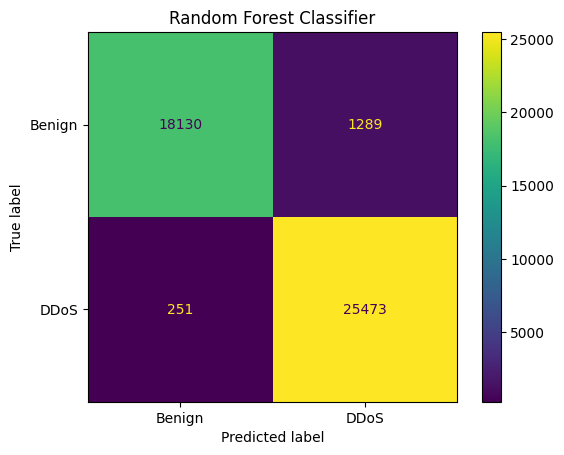

In [116]:
matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Benign', 'DDoS'])
cm.plot()
plt.title(label='Random Forest Classifier')

In [117]:
tn, fp, fn, tp = matrix.ravel()

recall = tp/(tp + fn) * 100
precision = tp/(tp+fp) * 100
f1_score = 2 * ((precision * recall) / (precision + recall))
accuracy = accuracy_score(ytest, ypred)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1_score}')
print(f'Accuracy: {accuracy}')

Recall: 99.02425750272118
Precision: 95.18346909797474
F1 Score: 97.06588423579619
Accuracy: 0.9658861839044813


In [118]:
#gb_clf8 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.7, subsample=0.5) #log_loss is the default loss function
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

#gb_clf8.fit(Xtrain, ytrain)
#ypred = gb_clf8.predict(Xtest)
#print(accuracy_score(ytest, ypred))

gb_clf9 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, subsample=1)
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

gb_clf9.fit(Xtrain, ytrain)
ypred = gb_clf9.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9569368451365661


Text(0.5, 1.0, 'Random Forest Classifier')

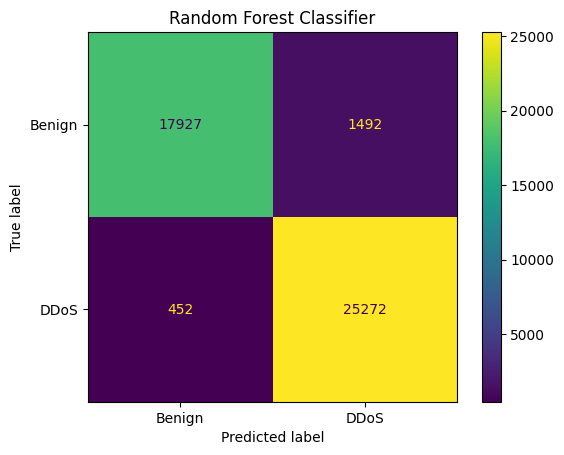

In [119]:
matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Benign', 'DDoS'])
cm.plot()
plt.title(label='Random Forest Classifier')

In [120]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [500, 750],
    'learning_rate': [0.05, 0.1, 0.3],
    'subsample': [0.5, 0.75, 1.0],
}

grid_search = GridSearchCV(estimator=gb, param_grid=gb_params, cv=5, scoring='recall', n_jobs=-1, verbose=3)
grid_search.fit(Xtrain, ytrain)
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'learning_rate': 0.3, 'n_estimators': 750, 'subsample': 0.75}
Best recall score: 0.9825612672856445
